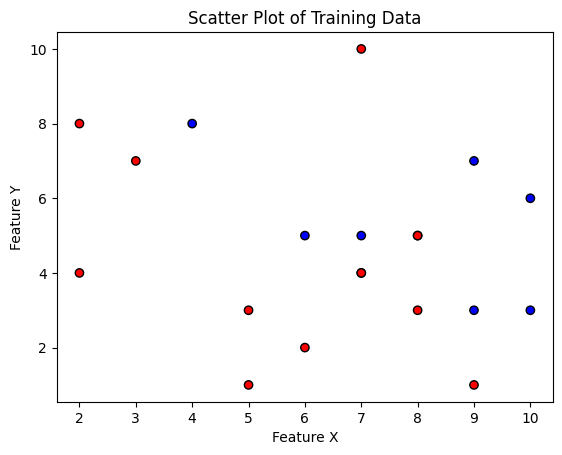

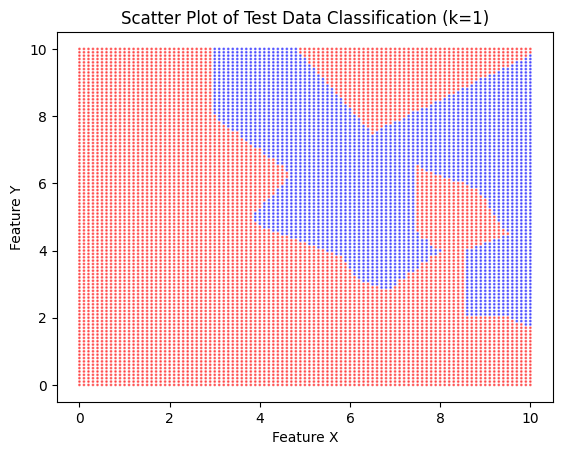

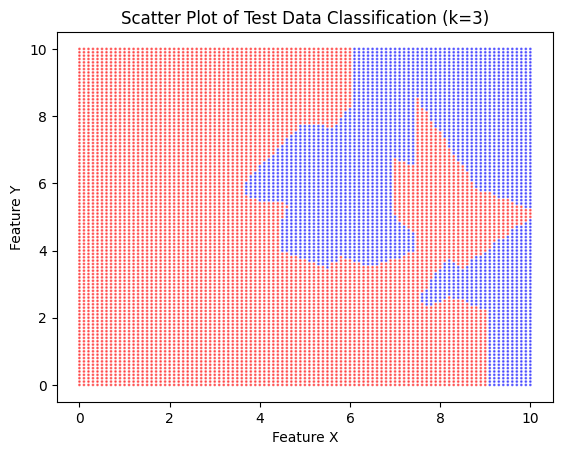

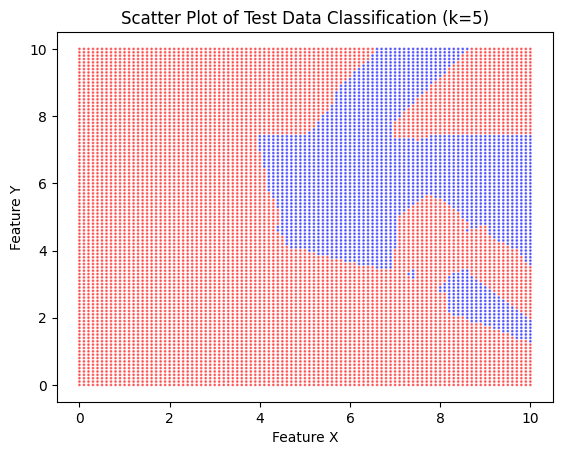

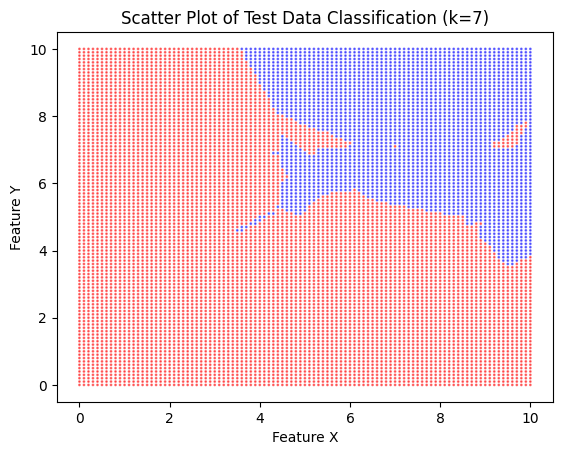

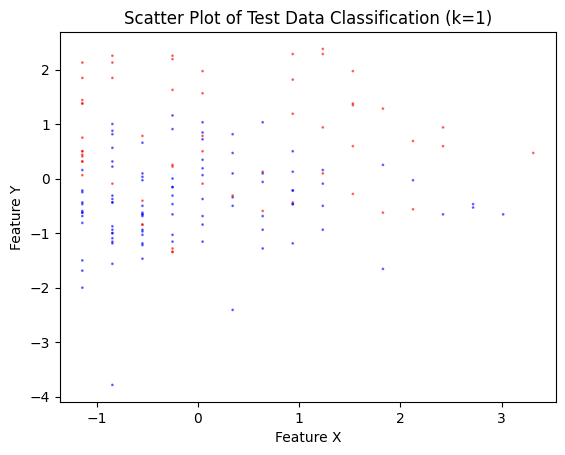

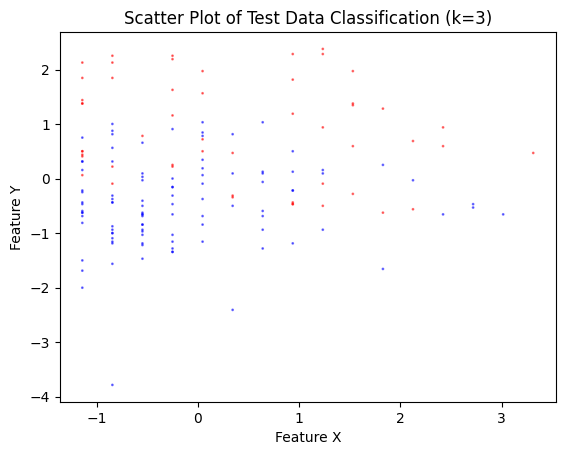

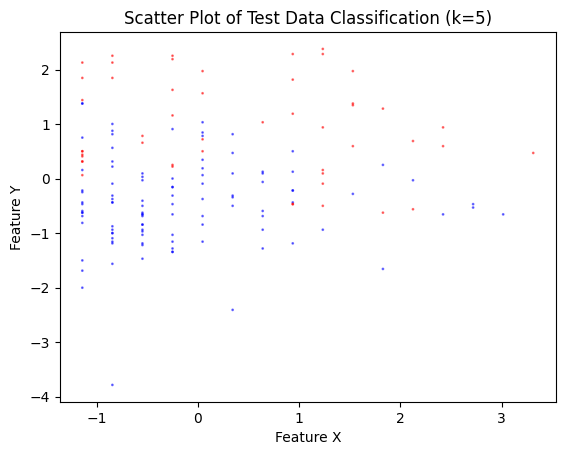

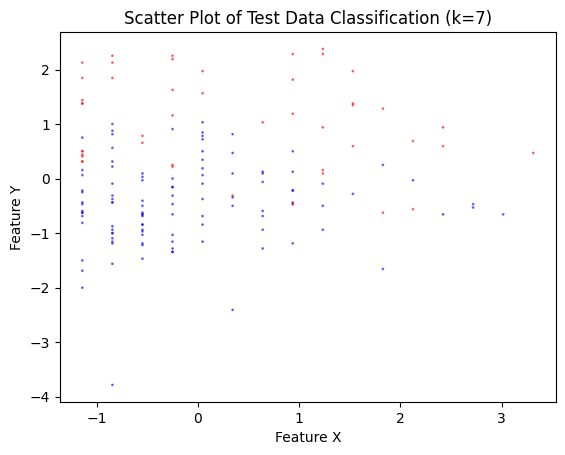

Confusion Matrix - Training Data:
 [[361  39]
 [ 59 155]]
Confusion Matrix - Test Data:
 [[76 24]
 [26 28]]
Performance Metrics:
 {'train': {'precision': 0.7989690721649485, 'recall': 0.7242990654205608, 'f1_score': 0.7598039215686274}, 'test': {'precision': 0.5384615384615384, 'recall': 0.5185185185185185, 'f1_score': 0.5283018867924528}}
The model may be overfitting.
Best k found using GridSearchCV: 14
Best k found using RandomizedSearchCV: 12


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

def generate_random_data(num_points=20):
    np.random.seed(42)
    X = np.random.randint(1, 11, size=(num_points, 2))
    y = np.random.choice([0, 1], size=num_points)
    return X, y

def plot_training_data(X, y):
    colors = ['blue' if label == 0 else 'red' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='k')
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title("Scatter Plot of Training Data")
    plt.show()

def generate_test_data():
    x_values = np.arange(0, 10.1, 0.1)
    y_values = np.arange(0, 10.1, 0.1)
    X_test = np.array(np.meshgrid(x_values, y_values)).T.reshape(-1, 2)
    return X_test

def plot_test_data(X_test, y_test_pred, k):
    colors = ['blue' if label == 0 else 'red' for label in y_test_pred]
    plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, s=1, alpha=0.5)
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title(f"Scatter Plot of Test Data Classification (k={k})")
    plt.show()

def train_knn_2d(X_train, y_train, n_neighbors=3):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    return model

def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    X = df.drop(columns=['Outcome'])
    y = df['Outcome']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def train_knn_classifier(X_train, y_train, n_neighbors=3):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    metrics = {
        "train": {
            "precision": precision_score(y_train, y_train_pred),
            "recall": recall_score(y_train, y_train_pred),
            "f1_score": f1_score(y_train, y_train_pred),
        },
        "test": {
            "precision": precision_score(y_test, y_test_pred),
            "recall": recall_score(y_test, y_test_pred),
            "f1_score": f1_score(y_test, y_test_pred),
        }
    }
    return cm_train, cm_test, metrics

# Function to perform hyperparameter tuning using GridSearchCV
def find_best_k(X_train, y_train):
    param_grid = {'n_neighbors': np.arange(1, 21)}  # Testing k values from 1 to 20
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_['n_neighbors']

# Function to perform hyperparameter tuning using RandomizedSearchCV
def find_best_k_random(X_train, y_train):
    param_dist = {'n_neighbors': np.arange(1, 21)}  # Testing k values from 1 to 20
    random_search = RandomizedSearchCV(KNeighborsClassifier(), param_dist, cv=5, n_iter=10, random_state=42)
    random_search.fit(X_train, y_train)
    return random_search.best_params_['n_neighbors']

if __name__ == "__main__":
    file_path = "diabetes.csv"

    # Generate and visualize 2D training data
    X_2d, y_2d = generate_random_data()
    plot_training_data(X_2d, y_2d)

    # Generate and classify 2D test data for multiple values of k
    X_test_2d = generate_test_data()
    for k in [1, 3, 5, 7]:
        knn_2d = train_knn_2d(X_2d, y_2d, n_neighbors=k)
        y_test_pred_2d = knn_2d.predict(X_test_2d)
        plot_test_data(X_test_2d, y_test_pred_2d, k)

    # Load, preprocess, and split diabetes dataset (using first two features for 2D visualization)
    X, y = load_and_preprocess_data(file_path)
    X_project = X[:, :2]  # Select first two features
    X_train, X_test, y_train, y_test = split_data(X_project, y)

    # Train and evaluate for multiple k values
    for k in [1, 3, 5, 7]:
        knn_project = train_knn_classifier(X_train, y_train, n_neighbors=k)
        y_test_pred_project = knn_project.predict(X_test)
        plot_test_data(X_test, y_test_pred_project, k)

    # Full model evaluation using all features
    knn_model = train_knn_classifier(X_train, y_train)
    cm_train, cm_test, metrics = evaluate_model(knn_model, X_train, X_test, y_train, y_test)

    print("Confusion Matrix - Training Data:\n", cm_train)
    print("Confusion Matrix - Test Data:\n", cm_test)
    print("Performance Metrics:\n", metrics)

    if metrics["train"]["f1_score"] > metrics["test"]["f1_score"] + 0.1:
        print("The model may be overfitting.")
    elif metrics["train"]["f1_score"] < 0.6 and metrics["test"]["f1_score"] < 0.6:
        print("The model may be underfitting.")
    else:
        print("The model is well-fitted.")

    best_k = find_best_k(X_train, y_train)
    print(f'Best k found using GridSearchCV: {best_k}')

    # Find best k using RandomizedSearchCV
    best_k_random = find_best_k_random(X_train, y_train)
    print(f'Best k found using RandomizedSearchCV: {best_k_random}')


In [2]:
import pandas as pd
import numpy as np
import statistics
from sklearn.metrics import mean_squared_error, r2_score

def load_data(file_path, sheet_name):
    """Loads data from the given Excel file and sheet."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

def extract_matrices(data):
    """Extracts matrix A (quantities) and matrix C (payments) from the data."""
    A = data.iloc[:, 1:4].to_numpy()
    C = data.iloc[:, 4].to_numpy().reshape(-1, 1)
    return A, C

def compute_model_vector(A, C):
    """Computes the model vector X using the pseudo-inverse of A."""
    A_pseudo_inv = np.linalg.pinv(A)
    X = A_pseudo_inv @ C
    return X.flatten()

def evaluate_model(A, C, X):
    """Computes MSE, RMSE, MAPE, and R2 scores for the prediction model."""
    predictions = A @ X
    mse = mean_squared_error(C, predictions)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((C - predictions) / C)) * 100
    r2 = r2_score(C, predictions)
    return mse, rmse, mape, r2

file_path = "Lab Session Data.xlsx"
purchase_data = load_data(file_path, "Purchase data")
A, C = extract_matrices(purchase_data)
X = compute_model_vector(A, C)
mse, rmse, mape, r2 = evaluate_model(A, C, X)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R2 Score:", r2)

MSE: 3.2311742677852644e-27
RMSE: 5.684341886080802e-14
MAPE: 48.563788616351594
R2 Score: 1.0
